##          Project : Lending Club Loan Data Analysis     
###                                    by SHAKTI NATH SAINI

## 1. Exploratory Data Analysis

In [252]:
####################################################################
''' Step 0: Import all libraries'''
####################################################################

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import warnings

warnings.filterwarnings('ignore')

In [253]:
####################################################################
'''Step 1: Load the data'''
####################################################################

data = pd.read_csv(r'C:\Users\Shakti\Documents\Python Scripts\Projects\Lending Club Loan Data Analysis\loan_data.csv')

In [254]:
data.shape

(9578, 14)

In [255]:
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [256]:
# Handling missing values

data.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [257]:
#NO missing values

## 2: Exploratory data analysis of different factors of the dataset.

In [258]:
####################################################################
'''Step 2: Handling Non-Numerical Values'''
####################################################################

dummy = pd.get_dummies(data['purpose'])
dummy.head()

,all_other,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0


In [259]:
####################################################################
'''Step 3: Handling (droping) Categorical Columns'''
####################################################################

data.drop(['purpose'], axis=1, inplace=True)

In [260]:
df = pd.concat([data, dummy], axis=1)

In [261]:
df.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,all_other,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0


In [262]:
df.shape

(9578, 20)

In [263]:
y = df['credit.policy']
X = df.drop(['credit.policy'], axis=1)

In [264]:
# Standardize features by removing the mean and scaling to unit variance

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [265]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## 3.     Additional Feature Engineering

#### You will check the correlation between features and will drop those features which have a strong correlation

#### This will help reduce the number of features and will leave you with the most relevant features

In [266]:
# Check if the data is balanced

data['credit.policy'].value_counts(normalize=True)

1    0.80497
0    0.19503
Name: credit.policy, dtype: float64

In [267]:
####################################################################
'''Step 4: Check for Correlation'''
####################################################################

# Check for correlation between features

corr_matrix = data.corr()

high_corr = corr_matrix[corr_matrix>=0.5]

<AxesSubplot:>

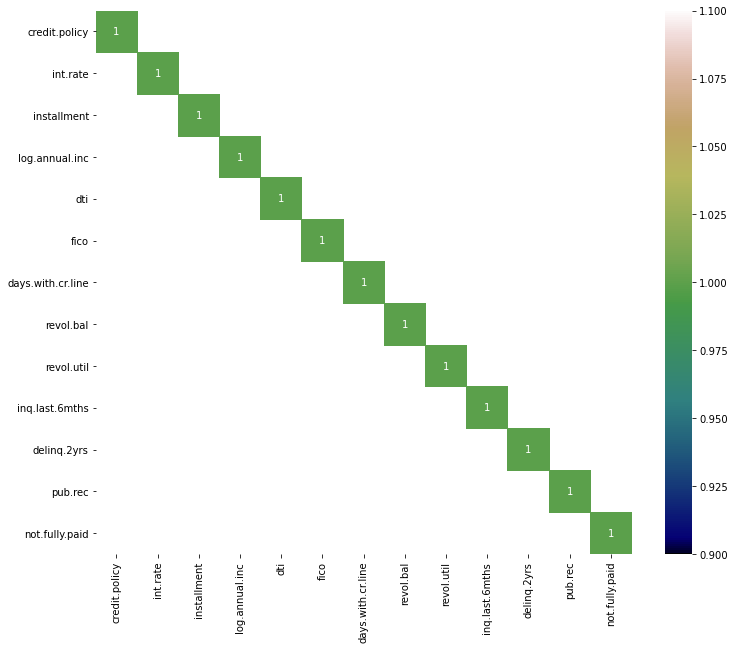

In [268]:
plt.figure(figsize = (12,10))
sns.heatmap(high_corr, cmap='gist_earth', annot=True, annot_kws={"size": 10})

Some of the features are correlated:
* revol.util & int.rate
* log.annual.inc & installment

But since the correlation is less than 0.5, there is no need to drop any of them.

## 4: Modelling

#### After applying EDA and feature engineering, you are now ready to build the predictive models

#### In this part, you will create a deep learning model using Keras with Tensorflow backend

In [269]:
####################################################################
'''Step 5: Building the Network'''
####################################################################

initializer = tf.keras.initializers.GlorotNormal()

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(units = 57 , activation= "relu", input_shape=(19,)))

model.add(tf.keras.layers.Dropout(0.01))
model.add(tf.keras.layers.Dense(units = 19 , activation= "relu"))

model.add(tf.keras.layers.Dropout(0.01))
model.add(tf.keras.layers.Dense(units = 19 , activation= "relu"))

model.add(tf.keras.layers.Dropout(0.01))
model.add(tf.keras.layers.Dense(units = 19 , activation= "relu"))

model.add(tf.keras.layers.Dropout(0.01))
model.add(tf.keras.layers.Dense(units = 1 , activation= "sigmoid"))

In [270]:
####################################################################
'''Step 6: Compiling the Model'''
####################################################################

model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.005),
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [271]:
####################################################################
'''Step 7: Early Stopping Condition'''
####################################################################

class MyThresholdCallback(tf.keras.callbacks.Callback):
    def __init__(self,cl):
        super(MyThresholdCallback,self).__init__()
        self.cl=cl
        
    def on_epoch_end(self, epoch, logs=None):
        testScore = logs['val_accuracy']
        trainScore = logs['accuracy']
        
        if testScore > trainScore and testScore >= self.cl:
            self.model.stop_training = True

In [272]:
####################################################################
'''Step 8: Fitting the Model'''
####################################################################

model.fit(X_train, y_train, epochs=1000, validation_data=(X_test,y_test), callbacks=[MyThresholdCallback(cl=0.95)])

Epoch 1/1000
240/240 [==============================] - 2s 3ms/step - loss: 0.3051 - accuracy: 0.8807 - val_loss: 0.2626 - val_accuracy: 0.8909
Epoch 2/1000
240/240 [==============================] - 1s 2ms/step - loss: 0.2717 - accuracy: 0.8923 - val_loss: 0.2396 - val_accuracy: 0.8987
Epoch 3/1000
240/240 [==============================] - 1s 2ms/step - loss: 0.2486 - accuracy: 0.9042 - val_loss: 0.2119 - val_accuracy: 0.9175
Epoch 4/1000
240/240 [==============================] - 1s 2ms/step - loss: 0.2381 - accuracy: 0.9133 - val_loss: 0.2071 - val_accuracy: 0.9238
Epoch 5/1000
240/240 [==============================] - 1s 2ms/step - loss: 0.2331 - accuracy: 0.9126 - val_loss: 0.2004 - val_accuracy: 0.9264
Epoch 6/1000
240/240 [==============================] - 1s 2ms/step - loss: 0.2231 - accuracy: 0.9190 - val_loss: 0.1880 - val_accuracy: 0.9295
Epoch 7/1000
240/240 [==============================] - 1s 2ms/step - loss: 0.1969 - accuracy: 0.9304 - val_loss: 0.1808 - val_accuracy:

In [273]:
####################################################################
'''Step 9: Check for Generalization'''
####################################################################

print("\n\nTraining Score  {} \nTesting Score   {}".format(model.evaluate(X_train,y_train)[1],
                                                            model.evaluate(X_test,y_test)[1]))

60/60 [==============================] - 0s 1ms/step - loss: 0.1315 - accuracy: 0.9603


Training Score  0.9691986441612244 
Testing Score   0.9603340029716492


In [274]:
####################################################################
'''Step 10: Prediction'''
####################################################################

y_pred = model.predict_classes(X_test)

In [275]:
# Confusion Matrix
print(confusion_matrix(y_test, y_pred))

[[ 306   66]
 [  10 1534]]


In [276]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.82      0.89       372
           1       0.96      0.99      0.98      1544

    accuracy                           0.96      1916
   macro avg       0.96      0.91      0.93      1916
weighted avg       0.96      0.96      0.96      1916



In [277]:
####################################################################
'''                          End                          '''
####################################################################

'                          End                          '